#### 필수과제 
- 타이타닉 데이터 전처리를 통해서 f1 스코어를 높여주세요!
- 가장 높은 f1 스코어를 만드는 것이 목표
- 모든 분들에게 f1 스코어를 물어보고 공유도 해야 한다.
- 가장 높은 f1 스코어가 나오신 경우는 간단한게 질문할 수 있음
- 교차검증 사용하셔서 구체적인 값까지 나오게해서 정리 꼭 필수입니다.
- 교차검증 횟수는 5번 진행해 주시고
- 모델링은 자유롭게 해주세요! 분류에 필요한 모델링 아무거나 여러가지로 자유롭게 진행해주세요!
- 가장 높은 f1스코어를 찾습니다!

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- survived : 생존 여부(생존은 1, 아닌 경우는 0)
- pclass : Passenger Class, 승객 등급
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동승한 형제 또는 배우자 수
- parch : 동승한 부모 또는 자녀 수
- fare : 승객 지불 요금
- embarked : 승선항 (C = 쉘 부르크, Q = 퀸즈타운, S = 사우스햄튼)
- class : 객실 등급
- who : 남자, 여자, 아이
- adult_male : 성인 남자인지 여부
- deck : 선실 번호
- embark_town : 탑승지 이름
- alive : 생존여부
- alone : 혼자 탑승했는지 여부

#### EDA

0    549
1    342
Name: survived, dtype: int64


<Axes: >

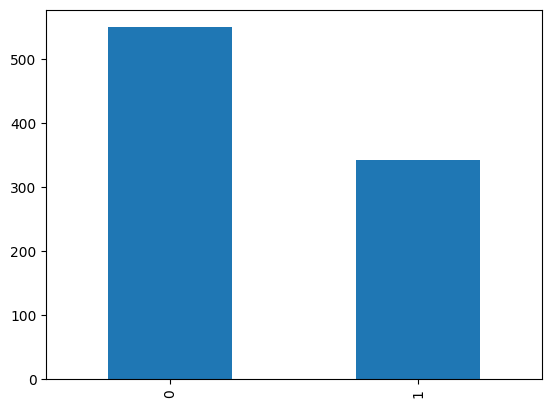

In [ ]:
print(df['survived'].value_counts())
df['survived'].value_counts().plot.bar()

3    491
1    216
2    184
Name: pclass, dtype: int64


<Axes: xlabel='pclass', ylabel='count'>

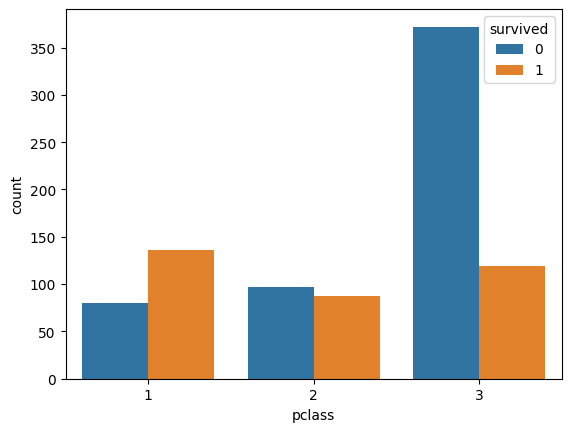

In [ ]:
print(df['pclass'].value_counts())
sns.countplot(x = 'pclass', hue = 'survived', data = df)

- 등급이 높을수록 많은 사람이 생존

S    644
C    168
Q     77
Name: embarked, dtype: int64


<Axes: xlabel='embarked', ylabel='count'>

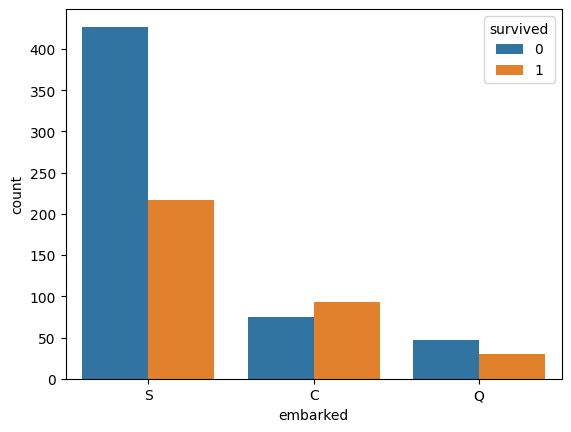

In [ ]:
print(df['embarked'].value_counts())
sns.countplot(x = 'embarked', hue = 'survived', data = df)

- 사우스햄튼에서 많이 탑승했고,
- 약 60%가 사망함

male      577
female    314
Name: sex, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

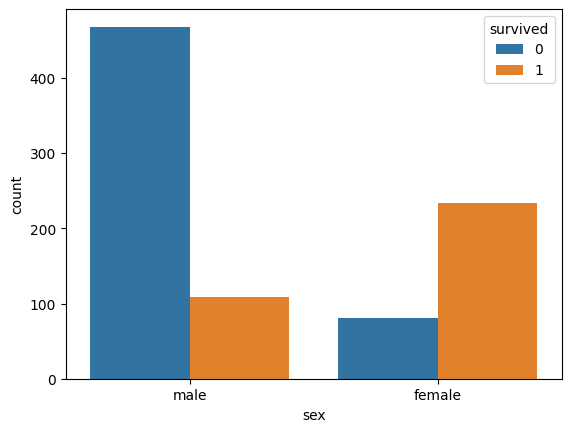

In [ ]:
print(df['sex'].value_counts())
sns.countplot(x = 'sex', hue = 'survived', data = df)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64


<Axes: xlabel='sibsp', ylabel='count'>

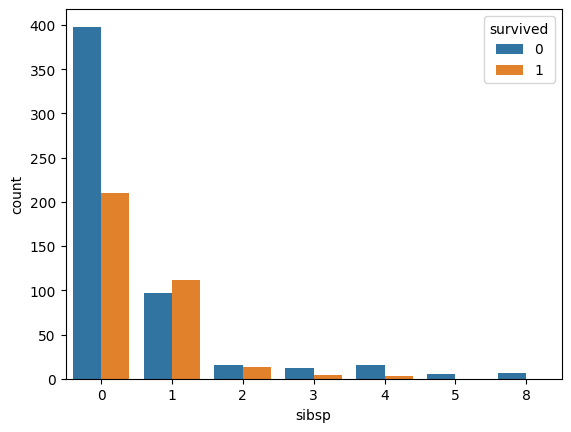

In [ ]:
print(df['sibsp'].value_counts())
sns.countplot(x = 'sibsp', hue = 'survived', data = df)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64


<Axes: xlabel='parch', ylabel='count'>

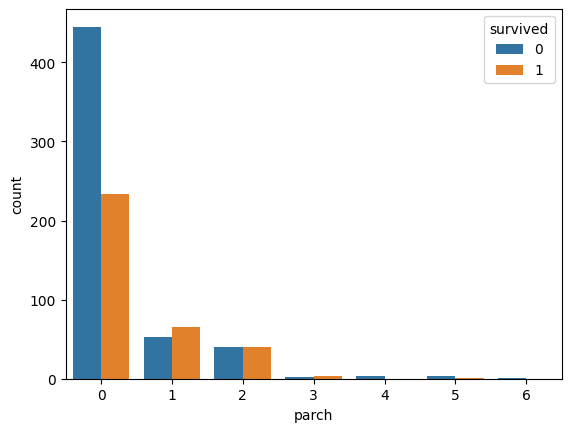

In [ ]:
print(df['parch'].value_counts())
sns.countplot(x = 'parch', hue = 'survived', data = df)

#### preprocessing

In [ ]:
df = df.drop(columns = ['pclass', 'embark_town', 'deck', 'alive']) # 중복되는 컬럼과 카테고리 형 변수의 결측치가 많은 deck을 삭제제

- 결측치 처리

In [ ]:
# 결측치 처리를 위해 target에 따라 데이터프레임을 분리
df_0 = df[df['survived'] == 0]
df_1 = df[df['survived'] == 1]

In [ ]:
df_0.isna().sum() # age에 결측치 존재

survived        0
sex             0
age           125
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [ ]:
df_1.isna().sum() # age와 embarked 결측치 존재

survived       0
sex            0
age           52
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
alone          0
dtype: int64

- 사망자의 df에는 age와 deck에서 결측치 존재
- 생존자의 df에서는 age, deck, embark_town에서의 결측치 존재

<Axes: >

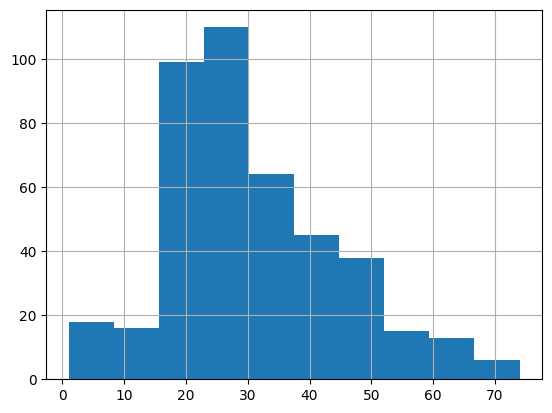

In [ ]:
df_0['age'].hist()

<Axes: >

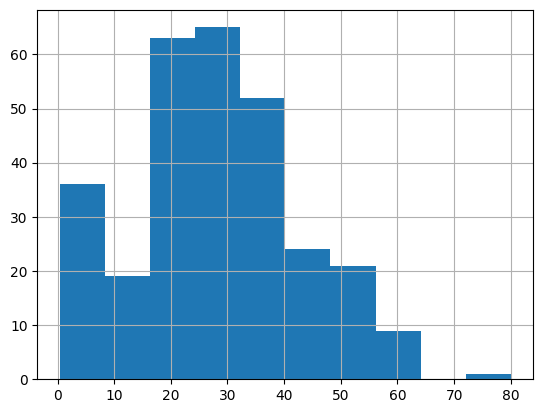

In [ ]:
df_1['age'].hist()

In [ ]:
# age에서의 결측치를 각각의 평균으로 대체
age_mean_0 = df_0['age'].mean()
age_mean_1 = df_1['age'].mean()

df_0['age'] = df_0['age'].fillna(age_mean_0)
df_1['age'] = df_1['age'].fillna(age_mean_1)

<ipython-input-231-7ce366e48279>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['age'] = df_0['age'].fillna(age_mean_0)
<ipython-input-231-7ce366e48279>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['age'] = df_1['age'].fillna(age_mean_1)


In [ ]:
# 생존자 df에서의 결측치인 embarked은 최빈값으로 대체
mode_embarked = df_1['embarked'].value_counts().index[0]
df_1['embarked'] = df_1['embarked'].fillna(mode_embarked)

<ipython-input-232-a247219ba132>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['embarked'] = df_1['embarked'].fillna(mode_embarked)


In [ ]:
df = pd.concat([df_0, df_1]).sort_index()
df

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,male,22.000000,1,0,7.2500,S,Third,man,True,False
1,1,female,38.000000,1,0,71.2833,C,First,woman,False,False
2,1,female,26.000000,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.000000,1,0,53.1000,S,First,woman,False,False
4,0,male,35.000000,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,S,Second,man,True,True
887,1,female,19.000000,0,0,30.0000,S,First,woman,False,True
888,0,female,30.626179,1,2,23.4500,S,Third,woman,False,False
889,1,male,26.000000,0,0,30.0000,C,First,man,True,True


- 범주형 변수 처리

In [ ]:
cols = df[['class', 'sibsp', 'parch']]
for col in cols:
  print(df[col].value_counts())

Third     491
First     216
Second    184
Name: class, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64


In [ ]:
# one-hot encoding
import pandas as pd
df_encoded = pd.get_dummies(df)

In [ ]:
# True/False를 숫자로 바꾸기
df_encoded[['adult_male', 'alone']] = df_encoded[['adult_male', 'alone']].astype(int)
df_encoded

,survived,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,0,22.000000,1,0,7.2500,1,0,0,1,0,0,1,0,0,1,0,1,0
1,1,38.000000,1,0,71.2833,0,0,1,0,1,0,0,1,0,0,0,0,1
2,1,26.000000,0,0,7.9250,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1,0,0,0,1,1,0,0,0,0,1
4,0,35.000000,0,0,8.0500,1,1,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,1,0,1,0,0,1,0,1,0,0,1,0
887,1,19.000000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0,0,0,1
888,0,30.626179,1,2,23.4500,0,0,1,0,0,0,1,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0,1,1,0,0,1,0,0,0,1,0


- 연속형 변수 처리

<Axes: >

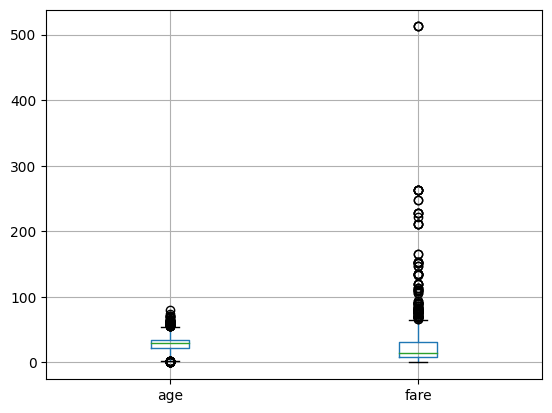

In [ ]:
df_encoded[['age', 'fare']].boxplot()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

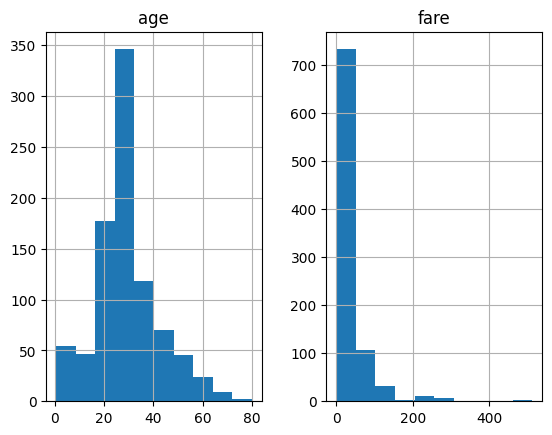

In [ ]:
df_encoded[['age', 'fare']].hist() # fare가 skew되어 있어보이므로 log 변환이 필요해보임

In [ ]:
# 로그 변환
import numpy as np
df_encoded['log_fare'] = np.log1p(df_encoded['fare'])

In [ ]:
# 로그 변환한 컬럼 사용하기 위해 컬럼 삭제
df_encoded = df_encoded.drop(columns = ['fare'])

<Axes: >

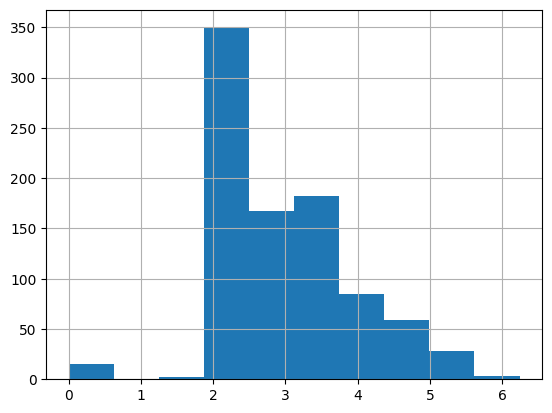

In [ ]:
df_encoded['log_fare'].hist() # skew 가 완화됨

In [ ]:
# 연속형 변수에 대해서 정규화를 해줌
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_encoded[['age', 'log_fare']])
df_encoded[['age_scaled', 'log_fare_scaled']] = ss.transform(df_encoded[['age', 'log_fare']])
df_encoded = df_encoded.drop(columns = ['age', 'log_fare'])

In [ ]:
df_encoded

,survived,sibsp,parch,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,age_scaled,log_fare_scaled
0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,-0.596004,-0.879741
1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0.634445,1.361220
2,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,-0.288392,-0.798540
3,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0.403736,1.062038
4,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0.403736,-0.784179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,-0.211489,-0.333698
887,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,-0.826714,0.487082
888,0,1,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0.067375,0.242007
889,1,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,-0.288392,0.487082


#### Fitting, Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# input과 target 나누기
train_input = df_encoded.drop(columns = ['survived'])
train_target = df_encoded['survived']

In [ ]:
# 분류 모델들을 불러와서 f1 스코어 구하기
model = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), SVC(), GaussianNB()]
name = ['DT','RF','LR', 'SVC', 'NB']

for model, name in zip(model, name):
    print('\n########## 사용하는 알고리즘',name,'########')
    print('f1_score')
    score = cross_val_score(model, train_input, train_target, scoring = 'f1', cv = 5)
    print(score)
    print('average of score :', np.mean(score))


########## 사용하는 알고리즘 DT ########
f1_score
[0.66666667 0.734375   0.76595745 0.75384615 0.71328671]
average of score : 0.7268263961216088

########## 사용하는 알고리즘 RF ########
f1_score
[0.74125874 0.75590551 0.80882353 0.67768595 0.83687943]
average of score : 0.7641106331037733

########## 사용하는 알고리즘 LR ########
f1_score
[0.77142857 0.74626866 0.74074074 0.70491803 0.8030303 ]
average of score : 0.7532772609405838

########## 사용하는 알고리즘 SVC ########
f1_score
[0.76033058 0.74418605 0.75384615 0.69026549 0.8       ]
average of score : 0.7497256531191685

########## 사용하는 알고리즘 NB ########
f1_score
[0.76190476 0.76470588 0.72992701 0.66666667 0.79710145]
average of score : 0.7440611534998004


In [ ]:
train_target.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
# 분류 모델들을 불러와서 f1 스코어 구하기기
model = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), SVC(), GaussianNB()]
name = ['DT','RF','LR', 'SVC', 'NB']

for model, name in zip(model, name):
    print('\n########## 사용하는 알고리즘',name,'########')
    print('f1_score')
    score = cross_val_score(model, train_input, train_target, scoring = 'f1_macro', cv = 5)
    print(score)
    print('average of score :', np.mean(score))


########## 사용하는 알고리즘 DT ########
f1_score
[0.72727875 0.78863444 0.81066348 0.78189244 0.76569699]
average of score : 0.7748332180786959

########## 사용하는 알고리즘 RF ########
f1_score
[0.79307725 0.82250799 0.85084632 0.75586425 0.8516815 ]
average of score : 0.8147954638950663

########## 사용하는 알고리즘 LR ########
f1_score
[0.81231979 0.79655775 0.79118485 0.77553594 0.84347944]
average of score : 0.8038155537582513

########## 사용하는 알고리즘 SVC ########
f1_score
[0.81898385 0.7994058  0.80612662 0.77311628 0.84247788]
average of score : 0.808022085710603

########## 사용하는 알고리즘 NB ########
f1_score
[0.79801399 0.80962567 0.78048862 0.74202899 0.83433054]
average of score : 0.7928975610479123


In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',